In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importowanie klas na potrzeby budowy sieci
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.random import set_seed
from tensorflow.keras.datasets.mnist import load_data

In [4]:
(X_train, y_train) , (X_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [19]:
X_train = X_train / 255
X_test = X_test / 255

X_train.min(), X_train.max()

(0.0, 1.0)

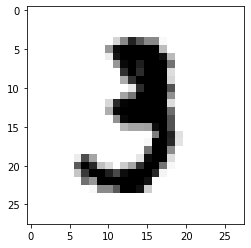

In [20]:
plt.imshow( X_train[10] , cmap="gray_r")

In [21]:
y_train[10]

3

In [22]:
set_seed(0)

model = Sequential()

model.add( Flatten(input_shape=(28,28)) ) # adapter danych wejściowych

model.add( Dense(256, activation="relu") )
#model.add( Dropout(0.1) )
model.add( Dense(128, activation="relu") )

model.add( Dense(10, activation="softmax") )

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.summary()

result = model.fit(X_train, y_train, epochs=10, validation_split=0.05)

Epoch 1/10
1782/1782 [==============================] - 8s 4ms/step - loss: 0.2102 - accuracy: 0.9371 - val_loss: 0.1011 - val_accuracy: 0.9697
Epoch 2/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0959 - accuracy: 0.9722 - val_loss: 0.0799 - val_accuracy: 0.9787
Epoch 3/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0718 - accuracy: 0.9800 - val_loss: 0.0900 - val_accuracy: 0.9773
Epoch 4/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0583 - accuracy: 0.9842 - val_loss: 0.1219 - val_accuracy: 0.9757
Epoch 5/10
1782/1782 [==============================] - 8s 4ms/step - loss: 0.0488 - accuracy: 0.9870 - val_loss: 0.1087 - val_accuracy: 0.9783
Epoch 6/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0427 - accuracy: 0.9887 - val_loss: 0.1646 - val_accuracy: 0.9730
Epoch 7/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0347 - accuracy: 0.9907 - val_loss: 0.1621 - val_accuracy:

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
y_pred = np.argmax( model.predict(X_test) , axis=-1)

In [35]:
y_test.shape, y_pred.shape

((10000,), (10000,))

In [33]:
np.argmax( model.predict(X_test[:1]), axis=-1)


array([7])

In [36]:
accuracy_score(y_test, y_pred)

0.9792

In [38]:
y_test[20], np.argmax( model.predict(X_test[20:21]), axis=-1)

(9, array([9]))

In [39]:
pd.DataFrame( confusion_matrix(y_test, y_pred) )

,0,1,2,3,4,5,6,7,8,9
0,967,1,0,1,1,6,1,1,1,1
1,0,1121,7,1,0,0,1,1,3,1
2,2,0,1007,5,2,0,2,10,4,0
3,0,0,4,992,0,3,0,5,1,5
4,1,0,3,0,961,0,2,2,0,13
5,2,0,0,8,1,872,4,0,2,3
6,4,3,1,1,6,8,935,0,0,0
7,1,1,5,1,0,0,0,1013,2,5
8,1,0,6,8,3,8,3,5,934,6
9,1,2,0,2,5,6,0,2,1,990


In [40]:
# Zapis/odczyt sieci
from tensorflow.keras.models import model_from_json, load_model

In [41]:
# zapis sieci
model.save("model.h5")
model.save("model/")

INFO:tensorflow:Assets written to: model/assets


In [42]:
# odczyt sieci
model2 = load_model("model/")
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [43]:
# odczyt sieci
model3 = load_model("model.h5")
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [48]:
# serializacja sieci
ann_conf = model.to_json() # zapisz strukture
model.save_weights("model-wagi.h5") # zapisz wagi

In [49]:
model4 = model_from_json(ann_conf)
model4.load_weights("model-wagi.h5")
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
